In [1]:
# If gspx is not installed, we add it to the path
import os, sys
gdir = os.path.dirname(os.getcwd())  # parent folder
sys.path.insert(0, gdir)

In [2]:
from gspx.utils.display import plot_graph
from gspx.datasets import WeatherGraphData, uk_weather

In [3]:
uk_data = WeatherGraphData()
Ar, coords = uk_data.graph
s = uk_data.signal

In [4]:
from gspx.qgsp import create_quaternion_weights
df = uk_weather()

Aq = create_quaternion_weights(
    Ar, df, icols=['humidity'], jcols=['temp'],
    kcols=['wind_speed'])

100%|██████████| 2014/2014 [00:05<00:00, 352.33it/s]


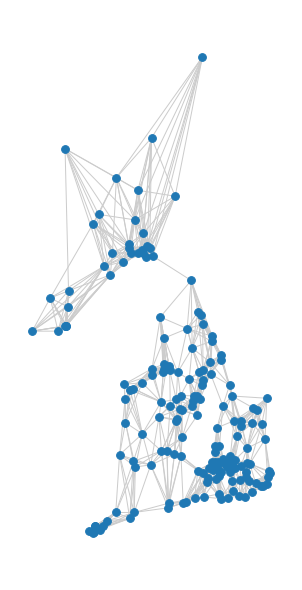

In [5]:
plot_graph(
    Aq.abs(), coords=coords,
    figsize=(4, 8), colormap='viridis',
    node_size=60)

In [6]:
from gspx.qgsp import QGFT

qgft = QGFT()
qgft.fit(Aq)

Running eigendecomposition of the shift operator.
Sorting the frequencies based on Total Variation.


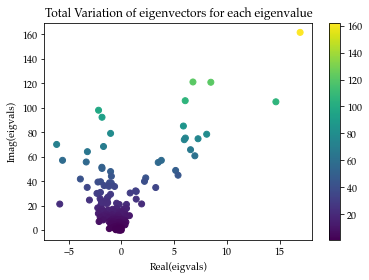

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(np.real(qgft.eigc), np.imag(qgft.eigc), c=qgft.tv_)
plt.colorbar()
plt.title("Total Variation of eigenvectors for each eigenvalue")
plt.xlabel("Real(eigvals)")
plt.ylabel("Imag(eigvals)")
plt.show()

In [ ]:
h_ideal = np.zeros(len(idx_freq))

# Bandwith of 20% the frequency support
bandwidth = int(len(idx_freq) / 5)
h_ideal[idx_freq[:bandwidth]] = 1

plt.figure()
plt.scatter(np.arange(len(idx_freq)), h_ideal[idx_freq], c=tv[idx_freq])
plt.xlabel("Index of eigenvalues")
plt.ylabel("Frequency response")

cbar = plt.colorbar()
cbar.set_label("TV of respective eigenvector", rotation=90)
plt.title("Ideal LPF")
plt.show()